In [2]:
# load tool

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

%matplotlib inline

C:\Users\Student\AppData\Local\Temp\ipykernel_12136\1438522751.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import decision tree model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [3]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [4]:
df_1 = pd.read_csv("apple_quality.csv")

In [5]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [7]:
df_1= df_1.replace(to_replace="good", value = 1)

In [8]:
df_1=df_1.replace(to_replace="bad", value = 0)

C:\Users\Student\AppData\Local\Temp\ipykernel_12136\3158947988.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1=df_1.replace(to_replace="bad", value = 0)


In [9]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [10]:
df_1=df_1.drop(4000)
# split data into X and y
X_1 = df_1.drop("Quality",axis=1)
y_1= df_1["Quality"]

* split into training and testing

In [11]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)

In [12]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [13]:
max_depth = range(1,31)
train_scores=[]
test_scores=[]
# loop through different n neighbours
for i in max_depth:
    DT.set_params(max_depth=i)
    DT.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(DT.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(DT.score(X1_test,y1_test))
    

In [14]:
train_scores

[0.6128125,
 0.6959375,
 0.7009375,
 0.743125,
 0.76875,
 0.8275,
 0.856875,
 0.88875,
 0.9128125,
 0.9340625,
 0.9521875,
 0.9675,
 0.9778125,
 0.9865625,
 0.9940625,
 0.998125,
 0.999375,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [15]:
test_scores

[0.625,
 0.69375,
 0.69375,
 0.7425,
 0.73875,
 0.7875,
 0.8125,
 0.79875,
 0.81625,
 0.80125,
 0.80375,
 0.81625,
 0.8075,
 0.8125,
 0.80375,
 0.80125,
 0.81125,
 0.8025,
 0.81,
 0.79625,
 0.805,
 0.80375,
 0.8075,
 0.81375,
 0.805,
 0.8,
 0.8125,
 0.81875,
 0.8025,
 0.81]

Max Decision Tree score on the test data: 81.88%


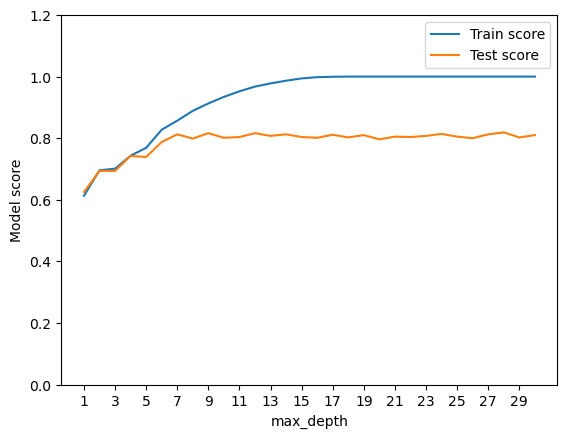

In [16]:
plt.plot(max_depth, train_scores, label="Train score")
plt.plot(max_depth, test_scores, label="Test score")
plt.ylim(0,1.2)
plt.xticks(np.arange(1,31,2))
plt.xlabel("max_depth")
plt.ylabel("Model score")
plt.legend()

print(f"Max Decision Tree score on the test data: {max(test_scores)*100:.2f}%")

In [17]:

f1_train_scores_gini=[]
f1_test_scores_gini=[]
# loop through different n neighbours
for i in max_depth:
    DT.set_params(max_depth=i, criterion = 'gini' )
    DT.fit(X1_train,y1_train)
    y1_train_pred = DT.predict(X1_train)
    y1_test_pred = DT.predict(X1_test)
    # update the training scores list
    f1_train_scores_gini.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_gini.append(f1_score(y1_test,y1_test_pred))
    
    

In [18]:
f1_train_scores_entropy=[]
f1_test_scores_entropy=[]
# loop through different n neighbours
for i in max_depth:
    DT.set_params(max_depth=i, criterion = 'entropy' )
    DT.fit(X1_train,y1_train)
    y1_train_pred = DT.predict(X1_train)
    y1_test_pred = DT.predict(X1_test)
    # update the training scores list
    f1_train_scores_entropy.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_entropy.append(f1_score(y1_test,y1_test_pred))

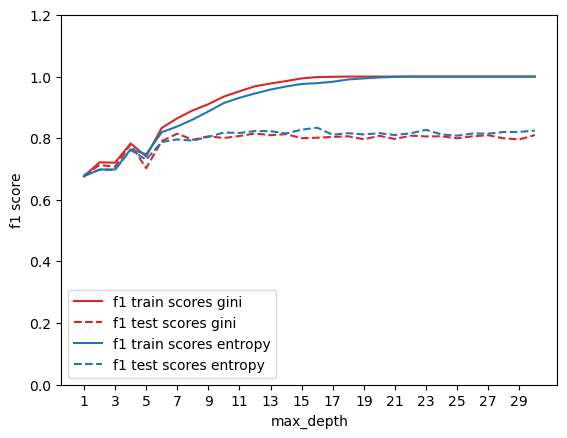

In [19]:
plt.plot(max_depth, f1_train_scores_gini, label="f1 train scores gini",color='C3',)
plt.plot(max_depth, f1_test_scores_gini, label="f1 test scores gini",color='C3', linestyle='--',)
plt.plot(max_depth, f1_train_scores_entropy, label="f1 train scores entropy",color='C0',)
plt.plot(max_depth, f1_test_scores_entropy, label="f1 test scores entropy",color='C0', linestyle='--',)
plt.xticks(np.arange(1,31,2))
plt.ylim(0,1.2)
plt.xlabel("max_depth")
plt.ylabel("f1 score")
plt.legend()



In [20]:
params_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,21),
    'min_samples_split':range(2,5),
}

In [21]:
grid_search = GridSearchCV(
    estimator=DT,
    param_grid=params_grid,
    return_train_score=True,
    cv=4,
    verbose=5,
)

In [22]:
grid_search.fit(X1_train,y1_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
[CV 1/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.618, test=0.598) total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.619, test=0.616) total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.609, test=0.625) total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.618, test=0.598) total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.618, test=0.598) total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.619, test=0.616) total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.609, test=0.625) total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.618, test=0.598) total time=   0.0s
[CV 1/4] END crit

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=30),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(2, 5)},
             return_train_score=True, verbose=5)

In [23]:
res = grid_search.cv_results_


In [24]:
res

{'mean_fit_time': array([0.00574142, 0.00676119, 0.00451177, 0.00649405, 0.0075236 ,
        0.00689787, 0.01046336, 0.00878489, 0.00946754, 0.01077551,
        0.01094687, 0.0112558 , 0.01352549, 0.01363021, 0.01374888,
        0.01710594, 0.01624763, 0.01687008, 0.01689738, 0.0168975 ,
        0.01712614, 0.01794112, 0.02012628, 0.02024323, 0.02239722,
        0.01962471, 0.02015209, 0.02087277, 0.02290022, 0.021438  ,
        0.02201682, 0.02112669, 0.02560264, 0.0233798 , 0.02195388,
        0.02392042, 0.02161235, 0.02266455, 0.02284354, 0.02242172,
        0.02515858, 0.02864021, 0.02609158, 0.02555913, 0.02313566,
        0.02642506, 0.02498215, 0.02687925, 0.02500719, 0.02397233,
        0.02404493, 0.02216661, 0.0234766 , 0.02360678, 0.02373266,
        0.0231728 , 0.02313817, 0.02273107, 0.02408671, 0.02301061,
        0.00615007, 0.00650436, 0.00677449, 0.00937808, 0.01102304,
        0.0099982 , 0.01267993, 0.01413214, 0.01337487, 0.0183785 ,
        0.01601595, 0.01563197,

In [25]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 3}

In [26]:
grid_search.score(X1_test,y1_test)

0.83

In [27]:
grid_search.score(X1_train,y1_train)
model=grid_search.best_estimator_

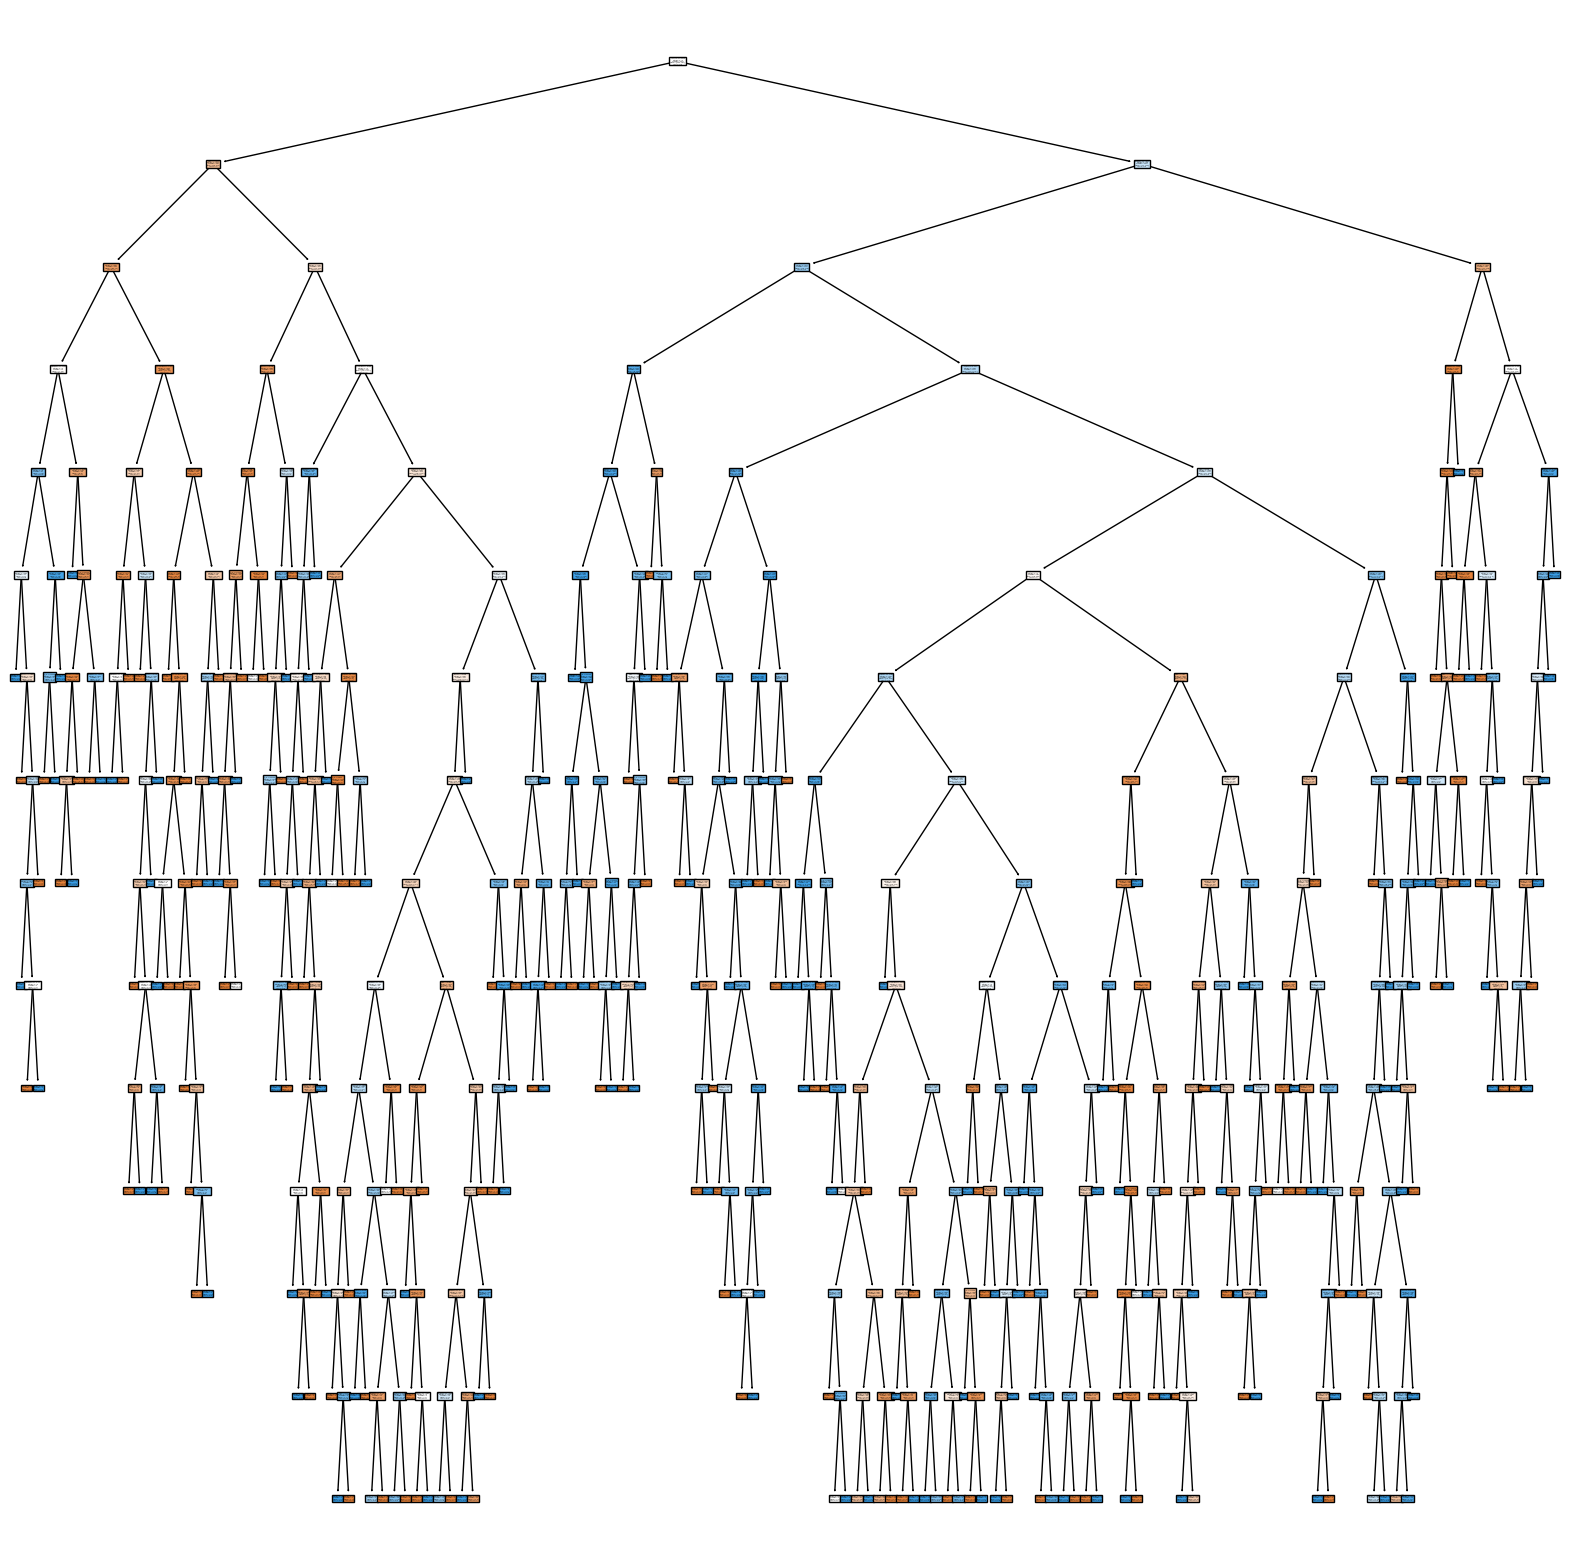

In [29]:
plt.figure(figsize=(20,20))
features = df_1.columns
classes = ['bad','good']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [30]:
from sklearn.model_selection import learning_curve, validation_curve

In [31]:
DT_best = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_split = 3)

In [32]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator=DT_best,
        X=X1_train,
        y=y1_train,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1 ],
        return_times = True 
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_time_mean = np.mean(fit_times, axis=1)
fit_time_std = np.std(fit_times, axis=1)
score_time_mean = np.mean(score_times, axis=1)
score_time_std = np.std(score_times, axis=1)

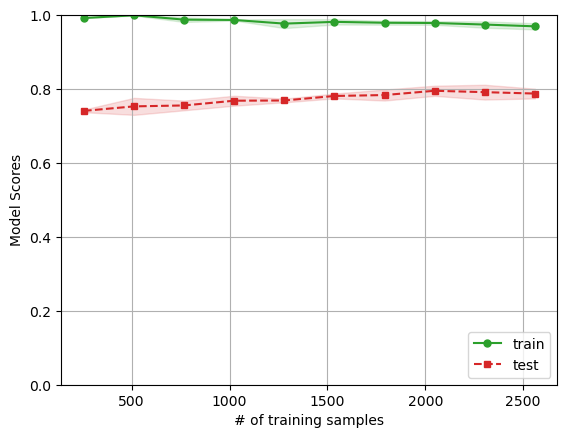

In [33]:
plt.plot(train_sizes, train_mean,
             color='C2', marker='o',
             markersize=5, label='train')

plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='C2')

plt.plot(train_sizes, test_mean,
             color='C3', linestyle='--',
             marker='s', markersize=5,
             label='test')

plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='C3')
plt.grid()
plt.ylim(0,1)
plt.xlabel('# of training samples')
plt.ylabel('Model Scores')
plt.legend(loc='lower right')
plt.show()

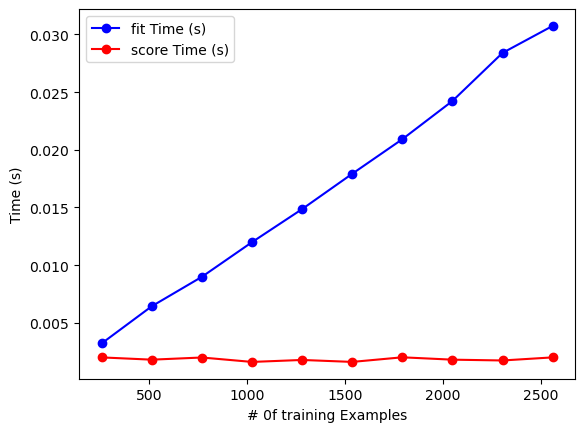

In [34]:
plt.figure()
# plt.title("Modeling Time: "+ title)
plt.xlabel("# 0f training Examples")
plt.ylabel("Time (s)")
# plt.fill_between(train_sizes, fit_time_mean - 2*fit_time_std, fit_time_mean + 2*fit_time_std, alpha=0.1, color="b")
# plt.fill_between(train_sizes, score_time_mean - 2*score_time_std, score_time_mean + 2*score_time_std, alpha=0.1, color="r")
plt.plot(train_sizes, fit_time_mean, 'o-', color="b", label="fit Time (s)")
plt.plot(train_sizes, score_time_mean, 'o-', color="r", label="score Time (s)")
plt.legend(loc="best")
plt.show()